# 1. Data Understanding and Representation

## Import the dataset and understand the features present

In [1]:
import pandas as pd
dataset = pd.read_csv("Audi.csv", header=0, index_col=None)
print(dataset.info())
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


**Features Present**:

The features with their descriptions and types:
1. model: model of the car (nominal)
2. year: car's registration year (numerical)
3. price: listed price of car (numerical)
4. transmission: type of gearbox in car (nominal)
5. mileage: car's distance used (numerical)
6. fuelType: type of fuel used (nominal)
7. tax: road tax (numerical)
8. mpg: miles per gallon (numerical)
9. engineSize: engine size in litres (numerical)

## Dropping Nominal Features

In [2]:
dataset.drop(["model", "transmission", "fuelType"], axis=1, inplace=True)
dataset

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0
10664,2020,16999,1978,150,49.6,1.0
10665,2020,17199,609,150,49.6,1.0
10666,2017,19499,8646,150,47.9,1.4


## Represent the features in matrix format

In [3]:
matrix = dataset.to_numpy()
matrix

array([[2.0170e+03, 1.2500e+04, 1.5735e+04, 1.5000e+02, 5.5400e+01,
        1.4000e+00],
       [2.0160e+03, 1.6500e+04, 3.6203e+04, 2.0000e+01, 6.4200e+01,
        2.0000e+00],
       [2.0160e+03, 1.1000e+04, 2.9946e+04, 3.0000e+01, 5.5400e+01,
        1.4000e+00],
       ...,
       [2.0200e+03, 1.7199e+04, 6.0900e+02, 1.5000e+02, 4.9600e+01,
        1.0000e+00],
       [2.0170e+03, 1.9499e+04, 8.6460e+03, 1.5000e+02, 4.7900e+01,
        1.4000e+00],
       [2.0160e+03, 1.5999e+04, 1.1855e+04, 1.5000e+02, 4.7900e+01,
        1.4000e+00]])

# 2. Implementing PCA using Covariance Matrices

## Center the dataset by subtracting the the mean of each from it

In [4]:
import numpy as np
for col in dataset.columns:
  dataset[col] -= dataset[col].mean()
dataset

,year,price,mileage,tax,mpg,engineSize
0,-0.100675,-10396.685039,-9092.244001,23.988564,4.629978,-0.530709
1,-1.100675,-6396.685039,11375.755999,-106.011436,13.429978,0.069291
2,-1.100675,-11896.685039,5118.755999,-96.011436,4.629978,-0.530709
3,-0.100675,-6096.685039,1124.755999,18.988564,16.529978,0.069291
4,1.899325,-5596.685039,-22829.244001,18.988564,-1.170022,-0.930709
...,...,...,...,...,...,...
10663,2.899325,-5897.685039,-20809.244001,18.988564,-1.170022,-0.930709
10664,2.899325,-5897.685039,-22849.244001,23.988564,-1.170022,-0.930709
10665,2.899325,-5697.685039,-24218.244001,23.988564,-1.170022,-0.930709
10666,-0.100675,-3397.685039,-16181.244001,23.988564,-2.870022,-0.530709


## Compute the covariance matrix of the centered dataset

In [11]:
covar = np.cov(dataset.to_numpy(), rowvar=False)
covar

array([[ 4.69802898e+00,  1.50467372e+04, -4.02315568e+04,
         1.35496126e+01, -9.85995164e+00, -4.12750635e-02],
       [ 1.50467372e+04,  1.37237520e+08, -1.47416129e+08,
         2.80256150e+05, -9.10735136e+04,  4.17640150e+03],
       [-4.02315568e+04, -1.47416129e+08,  5.52497116e+08,
        -2.62953810e+05,  1.20264703e+05,  1.00215065e+03],
       [ 1.35496126e+01,  2.80256150e+05, -2.62953810e+05,
         4.51184837e+03, -5.53139078e+02,  1.59198606e+01],
       [-9.85995164e+00, -9.10735136e+04,  1.20264703e+05,
        -5.53139078e+02,  1.67696842e+02, -2.85482417e+00],
       [-4.12750635e-02,  4.17640150e+03,  1.00215065e+03,
         1.59198606e+01, -2.85482417e+00,  3.63556749e-01]])

# 3. Eigenvalue-Eigenvector Equation

##  Formulate and solve the eigenvalue-eigenvector equation

In [12]:
# we use eigh instead of eig because covariance matrices are symmetric (always)
eig_values, eig_vectors = np.linalg.eigh(covar)

# 4. Solving for Principal Components

## Implement a method to find the solutions to the eigenvalue-eigenvector equation

In [27]:
def getKLargestEigenvectors(dataset: pd.DataFrame, k: int) -> tuple[np.ndarray, np.ndarray]:
  for col in dataset.columns:
    # standardizing data
    dataset[col] = (dataset[col] - dataset[col].mean())/dataset[col].std()
  matrix = np.cov(np.cov(dataset.to_numpy(), rowvar=False))
  # the values and their corresponding vectors are in ascending order by values
  eig_values, eig_vectors = np.linalg.eigh(matrix)
  # eig_vectors[:, i] represents ith eigenvector
  # return size (for nxn input matrix) is nxk
  return eig_values[-k:], eig_vectors[:, -k:]

getKLargestEigenvectors(dataset, len(dataset))

(array([1.21098603e-16, 3.72186140e-03, 1.47593543e-02, 1.03136621e-01,
        4.31972250e-01, 1.67889430e+00]),
 array([[ 0.50338426,  0.52415566,  0.18478063,  0.00276053, -0.50944722,
         -0.42211036],
        [ 0.29050634, -0.68969051,  0.11528106, -0.42771199,  0.02543304,
         -0.4930101 ],
        [ 0.54995289,  0.07078034,  0.54057081, -0.07893422,  0.44492115,
          0.44287664],
        [ 0.3741078 , -0.05017517, -0.38634088,  0.63220618,  0.45055618,
         -0.32493232],
        [ 0.4653249 , -0.12108499, -0.63947133, -0.22483523, -0.2907851 ,
          0.47411045],
        [-0.05725604,  0.47686357, -0.31963532, -0.60049037,  0.50428664,
         -0.22860981]]))

# 5. Sequential Variance Increase

## Calculate the total variance covered by the principal components

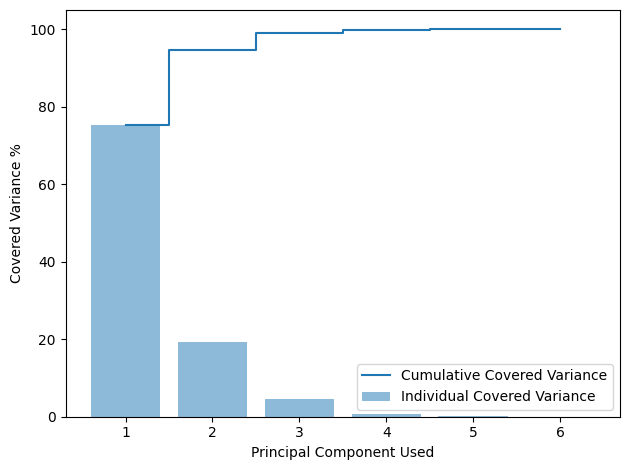

% variance covered by each component: 75.2029582317495 19.34939620882094 4.619813761720772 0.6611179152981342 0.1667138824106361 5.424387423795344e-15


In [28]:
import matplotlib.pyplot as plt
eig_values, eig_vectors = getKLargestEigenvectors(dataset, len(dataset))
tot_evals = sum(eig_values)
var_cover = [(i/tot_evals)*100 for i in eig_values[::-1]]

# plotting the covered variance against total variance
cumulative = np.cumsum(var_cover)
plt.bar(range(1, len(var_cover) + 1), var_cover, alpha=0.5, align='center', label='Individual Covered Variance')
plt.step(range(1, len(cumulative) + 1), cumulative, where='mid', label='Cumulative Covered Variance')
plt.ylabel('Covered Variance %')
plt.xlabel('Principal Component Used')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print("% variance covered by each component:", *var_cover)

# 6. Visualization using Pair Plots

## Pair plots of the original features

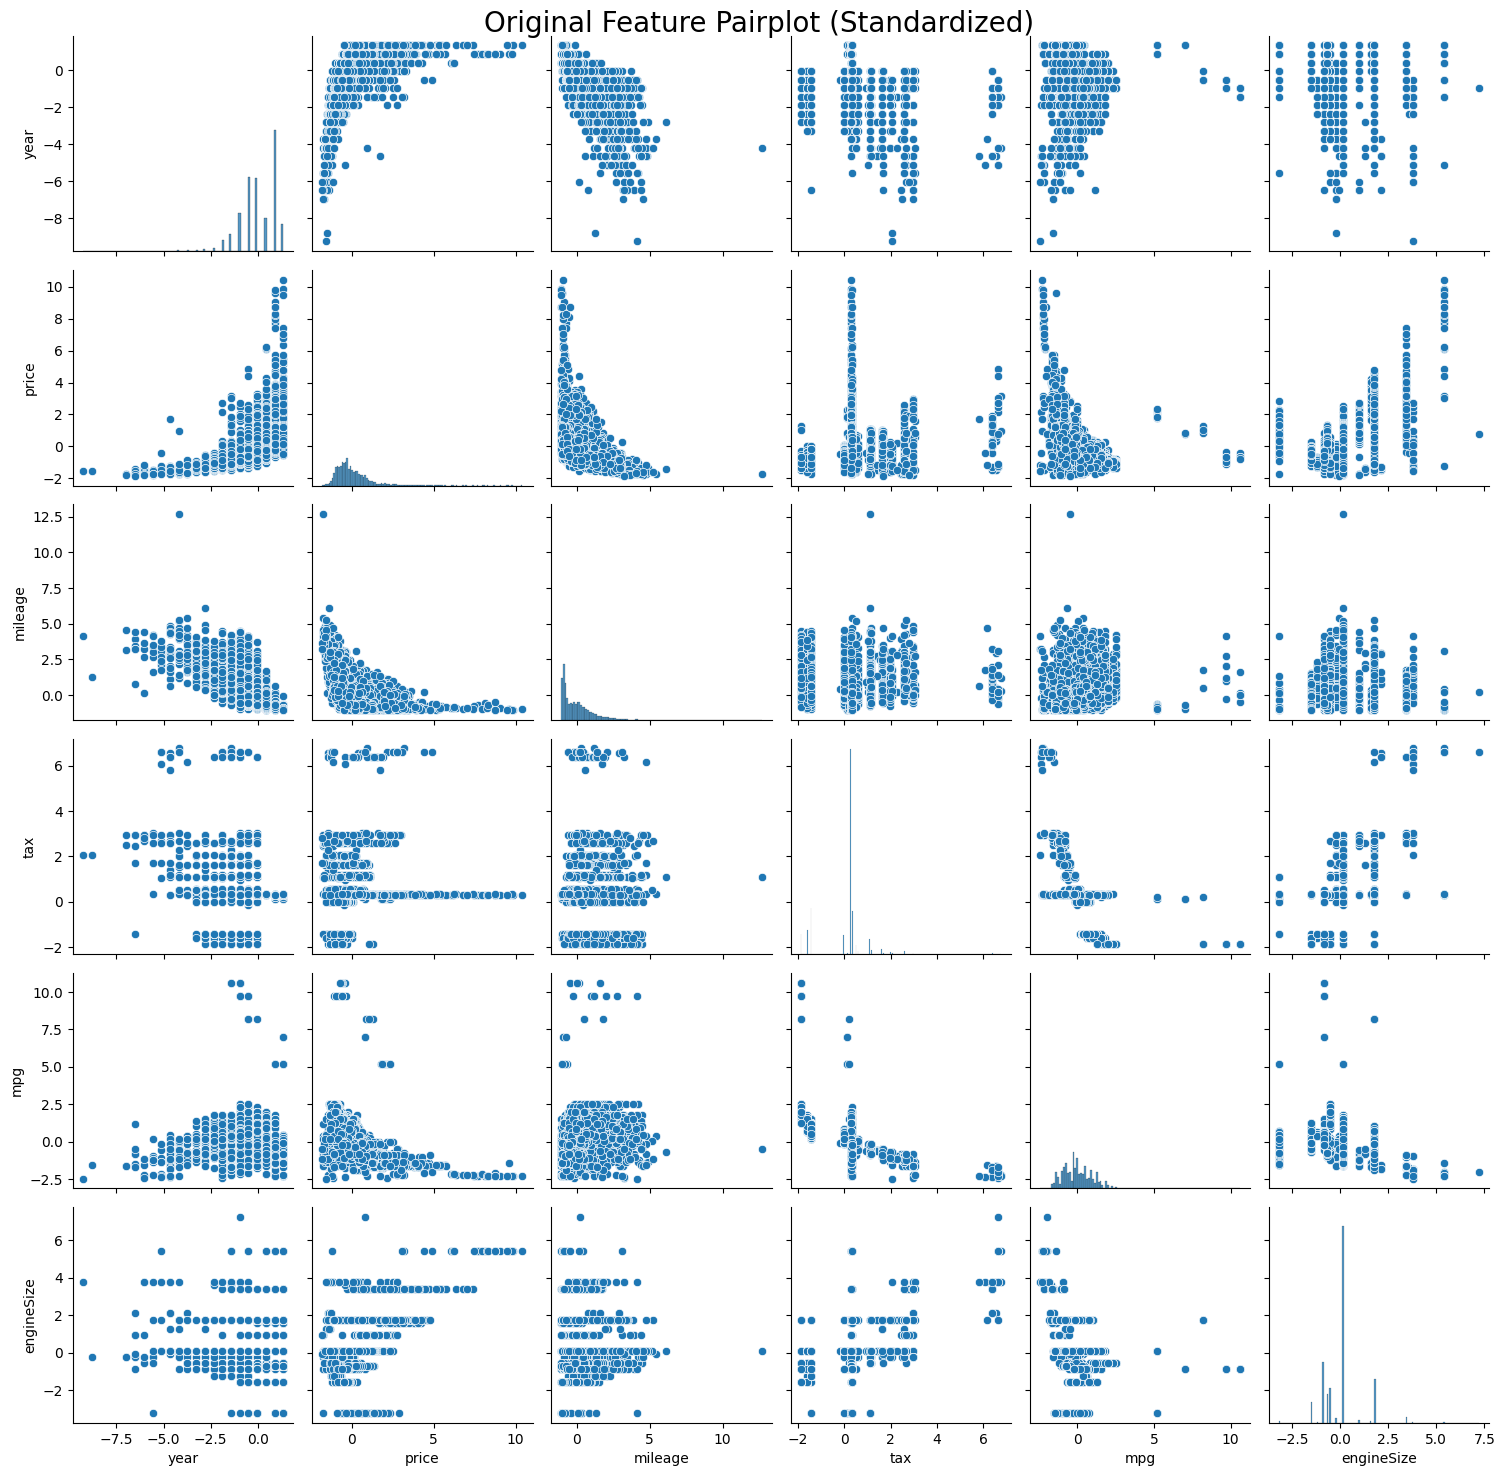

In [30]:
import warnings
from matplotlib.figure import Figure

# removing irrelevant deprecation warnings
warnings.filterwarnings('ignore')
import seaborn as sns
for col in dataset.columns:
  # standardizing data
  dataset[col] = (dataset[col] - dataset[col].mean())/dataset[col].std()
plot: Figure = sns.pairplot(dataset).figure
plot.suptitle("Original Feature Pairplot (Standardized)", fontsize=20)
plot.tight_layout(pad=1)
plt.show()

## Project the principal components onto these pair plots as vectors

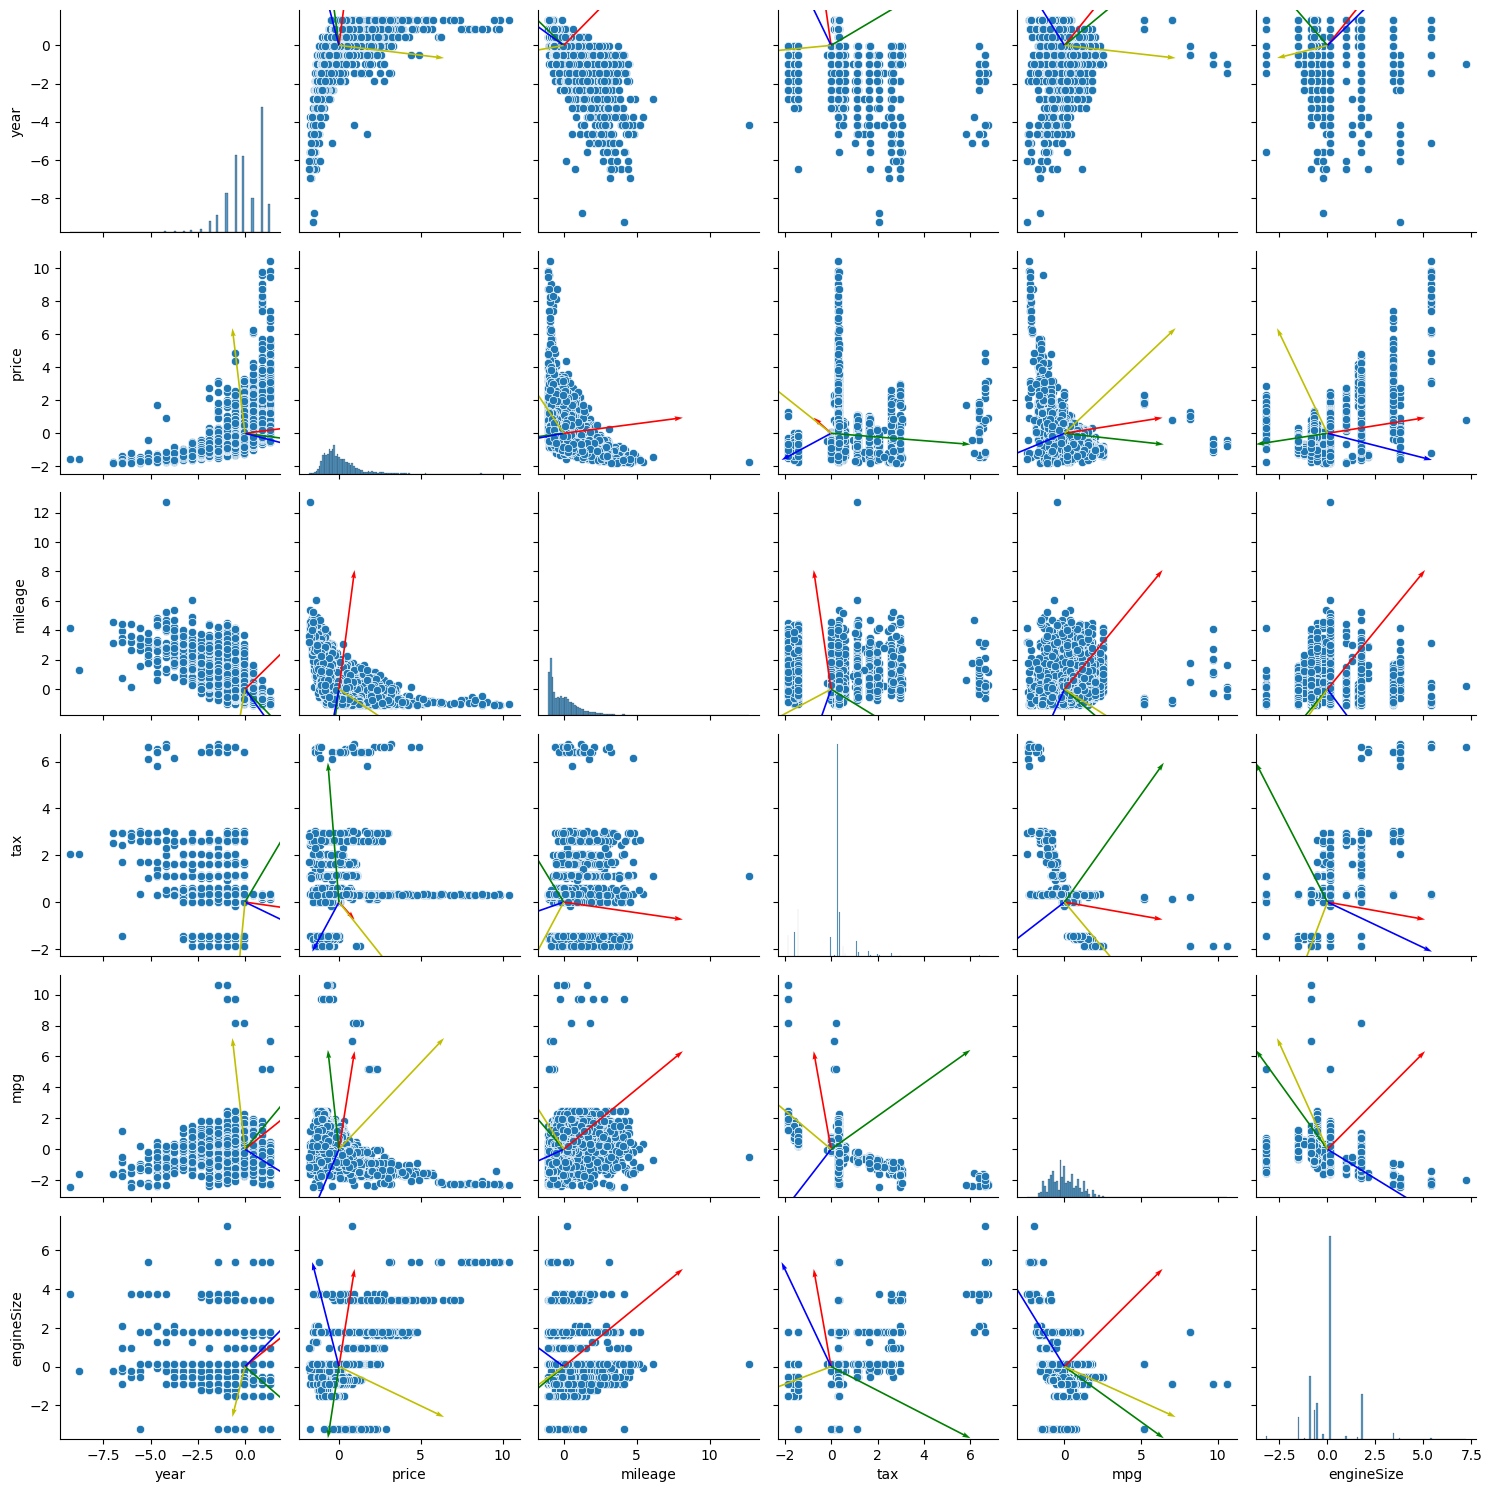

In [32]:
plot.suptitle("PCA Vector Projection on Feature Pairplot", fontsize=20)
plot: Figure = sns.pairplot(dataset, palette=sns.color_palette('bright')).figure
cols = dataset.columns
for ax in plot.axes:
  x, y = ax.xaxis.label.get_text(), ax.yaxis.label.get_text()
  if x and y and y != 'Count':
    xi, yi = cols.get_loc(x), cols.get_loc(y)
    ax.quiver([0, 0, 0, 0], [0, 0, 0, 0], eig_vectors[-4:, xi], eig_vectors[-4:, yi], color=['r','g', 'b', 'y'], scale=1)
plot.tight_layout(pad=1)
plt.show()

# 7. Conclusion and Interpretation

- We observe that 3 Principal Components are sufficient to cover over 99% variance of the centered data.
- Using these principal components is much more efficient than using the original features, since they are fewer than the original features, we can build complex models faster.
- From the visualizations we observe that the principal components cover the main trends being followed in the data accurately.